In [1]:
import tensorflow as tf
from keras.datasets import mnist
import keras
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\shrey\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Task 1
### Data Visualisation

In [2]:
#loading data 

mist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

n_train = x_train.shape[0]
n_test = x_test.shape[0]

#reshaping and rescaling data to be from -1 to 1
x_train, x_test = x_train / 127.5 -1, x_test / 127.5 -1
nb_features = np.prod(x_train.shape[1:])
x_train.resize ((n_train, nb_features))
x_test.resize ((n_test, nb_features))

#standardising data to complete pca on it
standardise = StandardScaler().fit_transform(x_train)
print(standardise.shape)

#using sklearn pca for two components
pca = sklearn.decomposition.PCA(n_components=2)

pca.fit(standardise)
pca_x = pca.transform(standardise)

print(pca_x.shape)

print(y_train.shape)

(60000, 784)
(60000, 2)
(60000,)


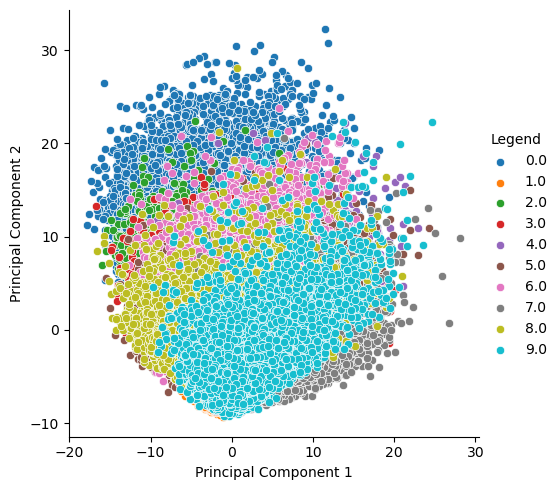

In [3]:
#visualising pca through seaborne 
pca_stack = np.vstack((pca_x[:, 1], pca_x[:, 0], y_train)).T 
pca_stack = pd.DataFrame(pca_stack, columns = ['Principal Component 1', 'Principal Component 2', 'Legend'])

sns.FacetGrid(pca_stack, hue = 'Legend', height=5).map(sns.scatterplot, 'Principal Component 1', 'Principal Component 2').add_legend()

## Task 4
### Convolutional Neural Networks

In [4]:
# Task 4.1
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.optimizers import Adam

In [5]:
model = Sequential()

#Using sequential model for base CNN
#three convolutional layers [32, 64, 128]
#first layer has small strides so requires pooling for the data
#the other two layers have 2,2 strides so eliminates the requirement for pooling
model.add(Conv2D(32, kernel_size=(4, 4),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (4, 4),strides=(2,2), activation='relu'))

model.add(Conv2D(128, (4, 4), strides=(2,2), activation='relu'))

#flatten model so that processed image can be input into dense neuron layer
#drop 25% of neurons to prevent over fitting
#using softmax for activation conditions as this is a multi-class classification problem
model.add(Flatten())
model.add(Dropout(0.25)) # to prevent overfitting
model.add(Dense(10, activation='softmax'))

# output the model's structure
model.summary()

#resizing the data so that the cnn can take the input
edge = int (np.sqrt(nb_features))
x_train.resize ((n_train, edge, edge))
x_test.resize ((n_test, edge, edge))

#compiling model using cross entropy loss model and adam optimiser
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            metrics=['accuracy'])

# using 15 epochs as standard amount with a standard batch size of 64
# leaving 20% of data for testing
history = model.fit(x_train, y_train, epochs=15,
        batch_size=64, validation_split=0.2)

C:\Users\shrey\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 5, 5, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,866 (647.91 KB)

 Trainable params: 165,866 (647.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8539 - loss: 0.4668 - val_accuracy: 0.9818 - val_loss: 0.0637
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9770 - loss: 0.0757 - val_accuracy: 0.9845 - val_loss: 0.0542
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9857 - loss: 0.0500 - val_accuracy: 0.9876 - val_loss: 0.0460
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9877 - val_loss: 0.0425
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9860 - val_loss: 0.0525
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9860 - val_loss: 0.0508
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9889 - val_loss: 0.0433
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.

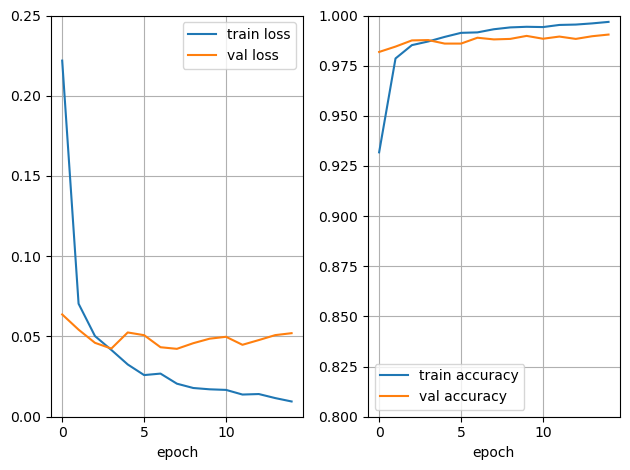

In [6]:
#plotting data 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,0.25])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0.8,1.0])
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.0679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


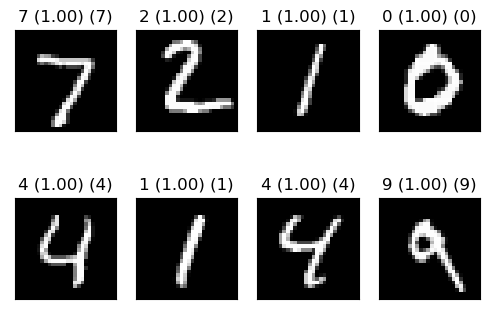

In [51]:
#evaluating test accuracy, returns around ~98.7% accuracy rates for a quick CNN model
_,test_accu = model.evaluate(x_test, y_test, verbose=1)

y_predict = model.predict(x_test[:8])

plt.figure(figsize=(6,4))
for i in range(8): 
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(),cmap='gray') # For CNN, add squeeze() to convert (32,32,1) to (32,32)
    predict_class = np.argmax(y_predict[i])
    plt.title("%s (%.2f) (%s)" % (predict_class, np.max(y_predict[i]),y_test[i]))

plt.show()

In [8]:
# Task 4.2
#
# Adding experiments, these will be elaborated on further in the report
experiment1  = Sequential()

experiment1.add(Conv2D(32, kernel_size=(4, 4),strides=(1,1),activation='relu',input_shape=(28,28,1)))
experiment1.add(MaxPooling2D(pool_size=(2, 2)))

experiment1.add(Conv2D(64, (4, 4),strides=(2,2), activation='relu'))

experiment1.add(Conv2D(128, (4, 4), strides=(2,2), activation='relu'))

experiment1.add(Flatten())
experiment1.add(Dropout(0.25)) # to prevent overfitting
experiment1.add(Dense(64, activation='relu'))

experiment1.add(Dropout(0.5)) # to prevent overfitting
experiment1.add(Dense(10, activation='softmax'))

# output the model's structure
experiment1.summary()

experiment1.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            metrics=['accuracy'])

history_1 = experiment1.fit(x_train, y_train, epochs=15,
                            batch_size=64, validation_split=0.2, verbose=1)

print("Test set: ")
experiment1.evaluate(x_test, y_test, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,482 (677.66 KB)

 Trainable params: 173,482 (677.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7646 - loss: 0.7278 - val_accuracy: 0.9741 - val_loss: 0.0882
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9639 - loss: 0.1326 - val_accuracy: 0.9818 - val_loss: 0.0689
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9773 - loss: 0.0871 - val_accuracy: 0.9854 - val_loss: 0.0552
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9816 - loss: 0.0716 - val_accuracy: 0.9847 - val_loss: 0.0584
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9838 - loss: 0.0607 - val_accuracy: 0.9883 - val_loss: 0.0447
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9870 - loss: 0.0448 - val_accuracy: 0.9883 - val_loss: 0.0471
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9884 - loss: 0.0423 - val_accuracy: 0.9871 - val_loss: 0.0495
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9906 - loss: 0.0369 - val_accurac

[0.05078556388616562, 0.9909999966621399]

In [9]:
experiment2  = Sequential()

experiment2.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=(28,28,1)))
experiment2.add(MaxPooling2D(pool_size=(2, 2)))

experiment2.add(Conv2D(64, (2, 2),strides=(2,2), activation='relu'))
experiment2.add(MaxPooling2D(pool_size=(2, 2)))

experiment2.add(Conv2D(128, (2, 2), activation='relu'))
experiment2.add(MaxPooling2D(pool_size=(2, 2)))

experiment2.add(Flatten())
experiment2.add(Dropout(0.25)) # to prevent overfitting
experiment2.add(Dense(64, activation='relu'))
experiment2.add(Dropout(0.5)) # to prevent overfitting
experiment2.add(Dense(10, activation='softmax'))

# output the model's structure
experiment2.summary()

experiment2.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            metrics=['accuracy'])

history_2 = experiment2.fit(x_train, y_train, epochs=15,
                            batch_size=64, validation_split=0.2, verbose=1)

print("Test set: ")
experiment2.evaluate(x_test, y_test, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 27, 27, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 2, 2, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,218 (196.16 KB)

 Trainable params: 50,218 (196.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5101 - loss: 1.3832 - val_accuracy: 0.9448 - val_loss: 0.1837
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9064 - loss: 0.3165 - val_accuracy: 0.9619 - val_loss: 0.1264
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9336 - loss: 0.2253 - val_accuracy: 0.9659 - val_loss: 0.1130
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9422 - loss: 0.1987 - val_accuracy: 0.9690 - val_loss: 0.1006
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9521 - loss: 0.1680 - val_accuracy: 0.9734 - val_loss: 0.0899
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9572 - loss: 0.1490 - val_accuracy: 0.9725 - val_loss: 0.0879
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9602 - loss: 0.1410 - val_accuracy: 0.9768 - val_loss: 0.0782
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9627 - loss: 0.1283 - val_accuracy: 0.

[0.06620526313781738, 0.9796000123023987]

In [10]:
experiment3  = Sequential()

experiment3.add(Conv2D(32, kernel_size=(4, 4),strides=(1,1),activation='relu',input_shape=(28,28,1)))
experiment3.add(MaxPooling2D(pool_size=(2, 2)))

experiment3.add(Conv2D(128, (4, 4),strides=(2,2), activation='relu'))

experiment3.add(Conv2D(256, (4, 4), strides=(2,2), activation='relu'))

# Flatten and Dense layers
experiment3.add(Flatten())

experiment3.add(Dense(256, activation='relu'))
experiment3.add(Dropout(0.3)) # Adjusted dropout to prevent overfitting
experiment3.add(Dense(128, activation='relu'))
experiment3.add(Dropout(0.5)) # to prevent overfitting
experiment3.add(Dense(10, activation='softmax'))

experiment3.summary()

experiment3.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            metrics=['accuracy'])

history_3 = experiment3.fit(x_train, y_train, epochs=15,
                            batch_size=64, validation_split=0.2, verbose=1)

print("Test set: ")
experiment3.evaluate(x_test, y_test, verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 1, 1, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 690,730 (2.63 MB)

 Trainable params: 690,730 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8094 - loss: 0.5738 - val_accuracy: 0.9803 - val_loss: 0.0736
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9783 - loss: 0.0840 - val_accuracy: 0.9787 - val_loss: 0.0785
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9851 - loss: 0.0555 - val_accuracy: 0.9857 - val_loss: 0.0551
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9887 - loss: 0.0414 - val_accuracy: 0.9851 - val_loss: 0.0628
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9911 - loss: 0.0325 - val_accuracy: 0.9784 - val_loss: 0.0854
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9927 - loss: 0.0270 - val_accuracy: 0.9862 - val_loss: 0.0534
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9944 - loss: 0.0215 - val_accuracy: 0.9889 - val_loss: 0.0534
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9940 - loss: 0.0217 - 

[0.06632521748542786, 0.9883000254631042]

In [11]:
experiment4  = Sequential()

experiment4.add(Conv2D(32, kernel_size=(4, 4),strides=(1,1),activation='relu',input_shape=(28,28,1)))

experiment4.add(Conv2D(128, (4, 4),strides=(2,2), activation='relu'))

experiment4.add(Conv2D(256, (4, 4), strides=(1,1), activation='relu'))
experiment4.add(MaxPooling2D(pool_size=(2, 2)))

experiment4.add(Conv2D(128, (2, 2),strides=(2,2), activation='relu'))


# Flatten and Dense layers
experiment4.add(Flatten())

experiment4.add(Dense(256, activation='relu'))
experiment4.add(Dropout(0.3)) # Adjusted dropout to prevent overfitting
experiment4.add(Dense(128, activation='relu'))
experiment4.add(Dropout(0.5)) # to prevent overfitting
experiment4.add(Dense(10, activation='softmax'))

experiment4.summary()

experiment4.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            metrics=['accuracy'])

history_4 = experiment4.fit(x_train, y_train, epochs=15,
                            batch_size=64, validation_split=0.2, verbose=1)

print("Test set: ")
experiment4.evaluate(x_test, y_test, verbose=1)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 2, 2, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 887,466 (3.39 MB)

 Trainable params: 887,466 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 86ms/step - accuracy: 0.8261 - loss: 0.5278 - val_accuracy: 0.9746 - val_loss: 0.0925
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 94ms/step - accuracy: 0.9804 - loss: 0.0723 - val_accuracy: 0.9849 - val_loss: 0.0537
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9867 - loss: 0.0492 - val_accuracy: 0.9889 - val_loss: 0.0479
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 82ms/step - accuracy: 0.9899 - loss: 0.0393 - val_accuracy: 0.9874 - val_loss: 0.0462
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 62s 83ms/step - accuracy: 0.9921 - loss: 0.0287 - val_accuracy: 0.9873 - val_loss: 0.0434
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9896 - val_loss: 0.0421
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.9939 - loss: 0.0205 - val_accuracy: 0.9888 - val_loss: 0.0515
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.9953 - loss: 0.0179 - 

[0.048624616116285324, 0.9907000064849854]

Experimental Results


<Figure size 640x480 with 0 Axes>

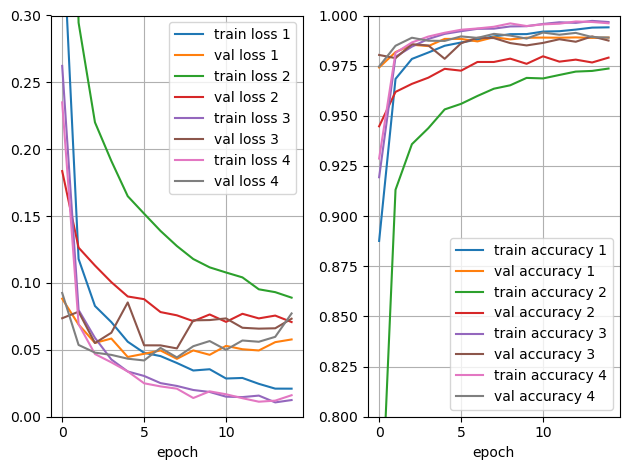

In [12]:
# plotting the results of the different experiments performed for 
plt.clf()

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history_1.history['loss'], label='train loss 1')
plt.plot(history_1.history['val_loss'], label='val loss 1')
plt.plot(history_2.history['loss'], label='train loss 2')
plt.plot(history_2.history['val_loss'], label='val loss 2')
plt.plot(history_3.history['loss'], label='train loss 3')
plt.plot(history_3.history['val_loss'], label='val loss 3')
plt.plot(history_4.history['loss'], label='train loss 4')
plt.plot(history_4.history['val_loss'], label='val loss 4')

plt.legend()
plt.grid(True)
plt.ylim([0,0.3])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history_1.history['accuracy'], label='train accuracy 1')
plt.plot(history_1.history['val_accuracy'], label='val accuracy 1')
plt.plot(history_2.history['accuracy'], label='train accuracy 2')
plt.plot(history_2.history['val_accuracy'], label='val accuracy 2')
plt.plot(history_3.history['accuracy'], label='train accuracy 3')
plt.plot(history_3.history['val_accuracy'], label='val accuracy 3')
plt.plot(history_4.history['accuracy'], label='train accuracy 4')
plt.plot(history_4.history['val_accuracy'], label='val accuracy 4')
plt.legend()
plt.grid(True)
plt.ylim([0.8,1.0])
plt.xlabel('epoch')

print("Experimental Results")
plt.tight_layout()
plt.show()


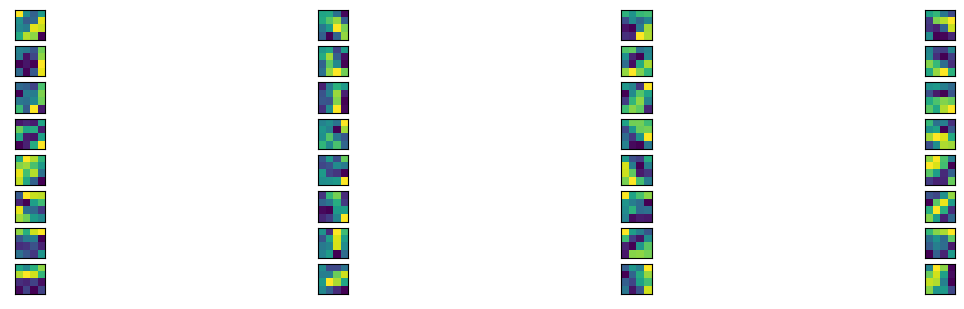

In [87]:
# plotting the filters

#getting filters from first layer
filters, _ = model.layers[0].get_weights()

#normalising filter values to 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#plotting 
n_filters, j = 32, 1
fig = plt.figure(figsize=(15,15))
for i in range(n_filters):
    #getting ith filter
    f = filters[:, :, :, i]
    #plotting each filter as it's own subplot
    ax = fig.add_subplot(n_filters, 4, j)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='viridis')
    j += 1

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


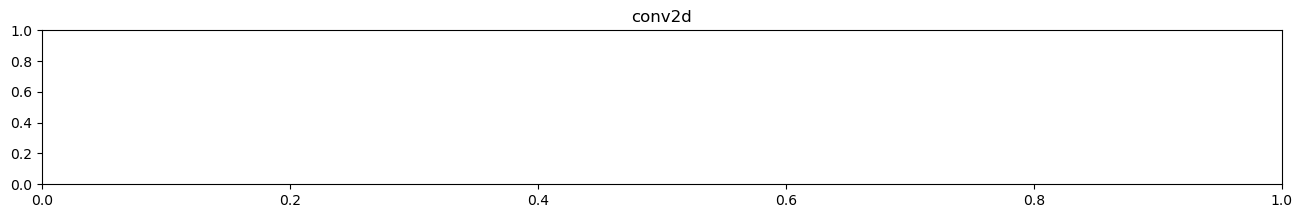

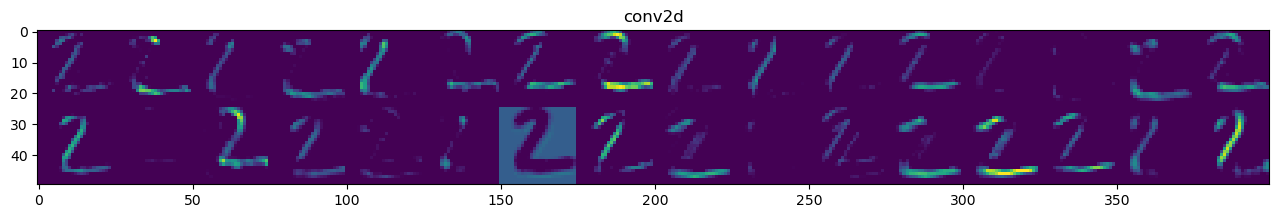

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


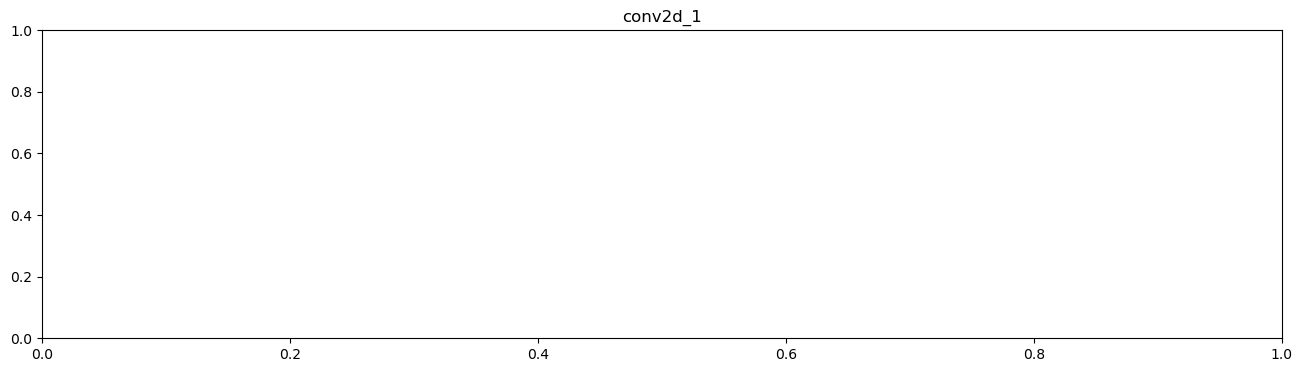

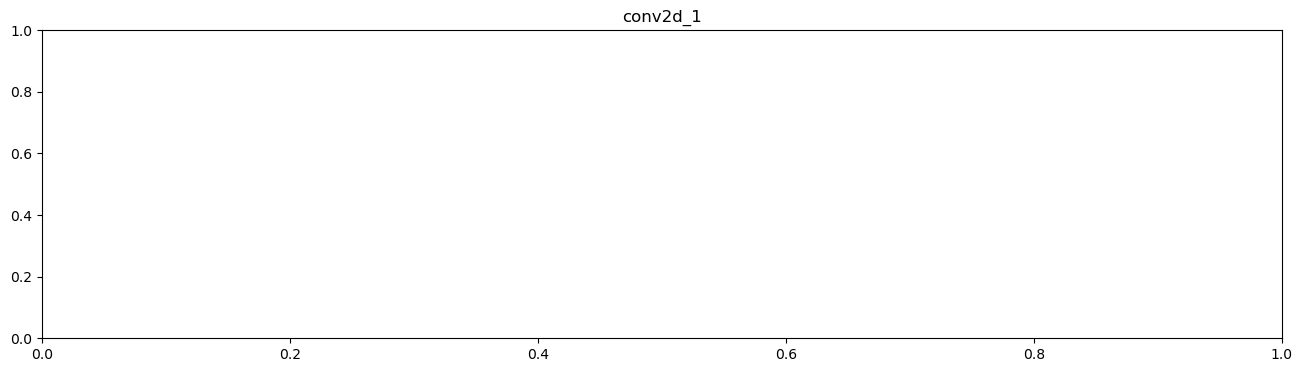

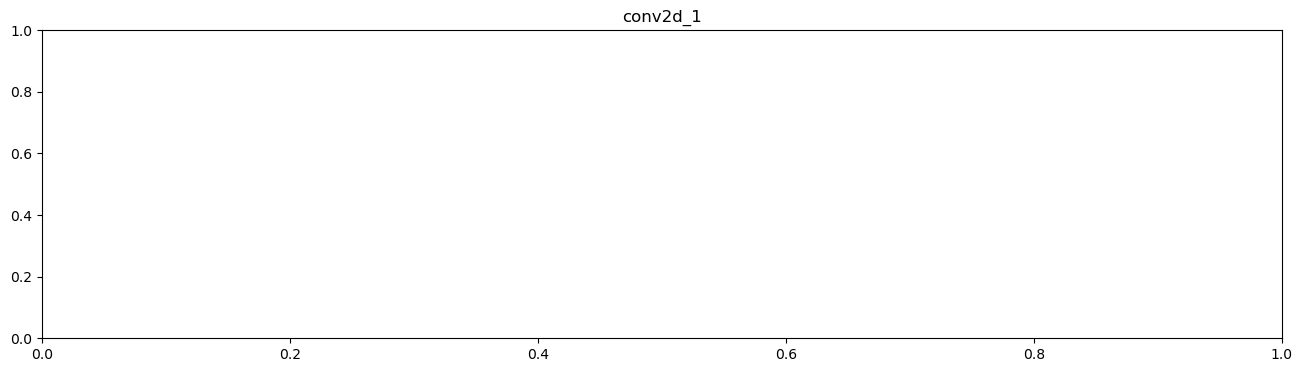

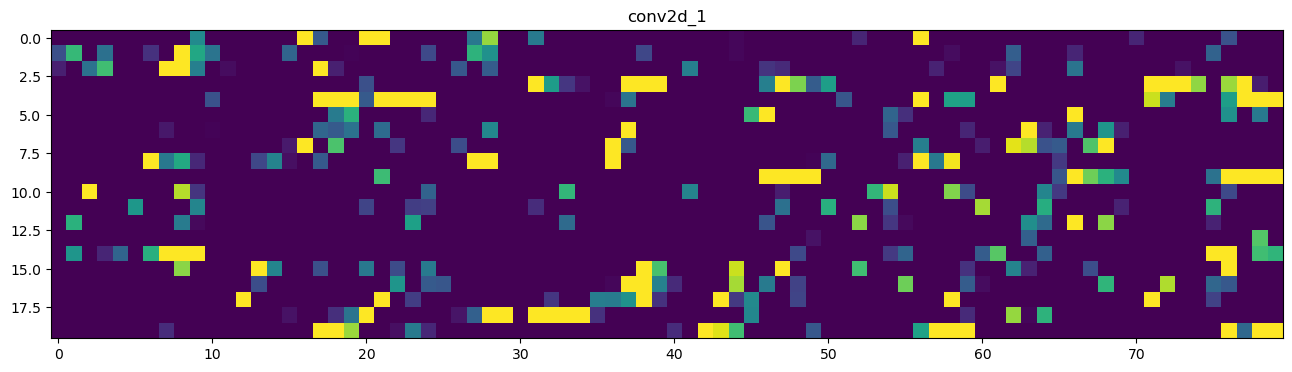

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


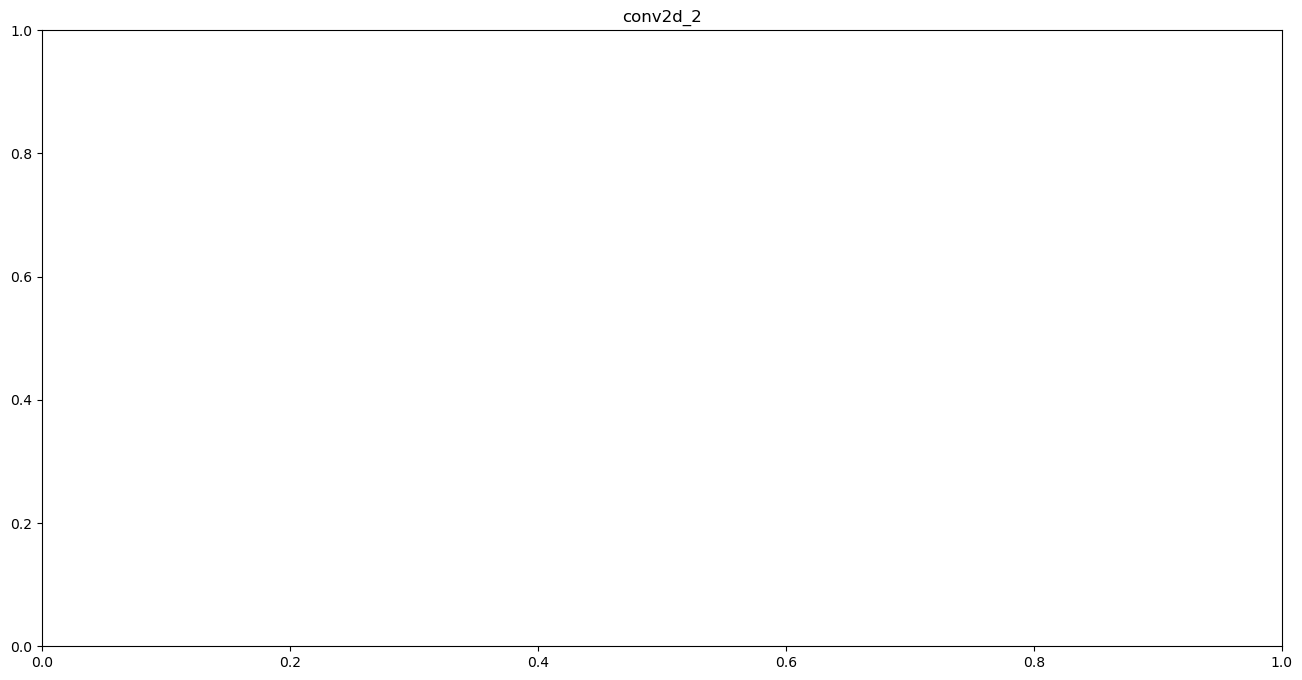

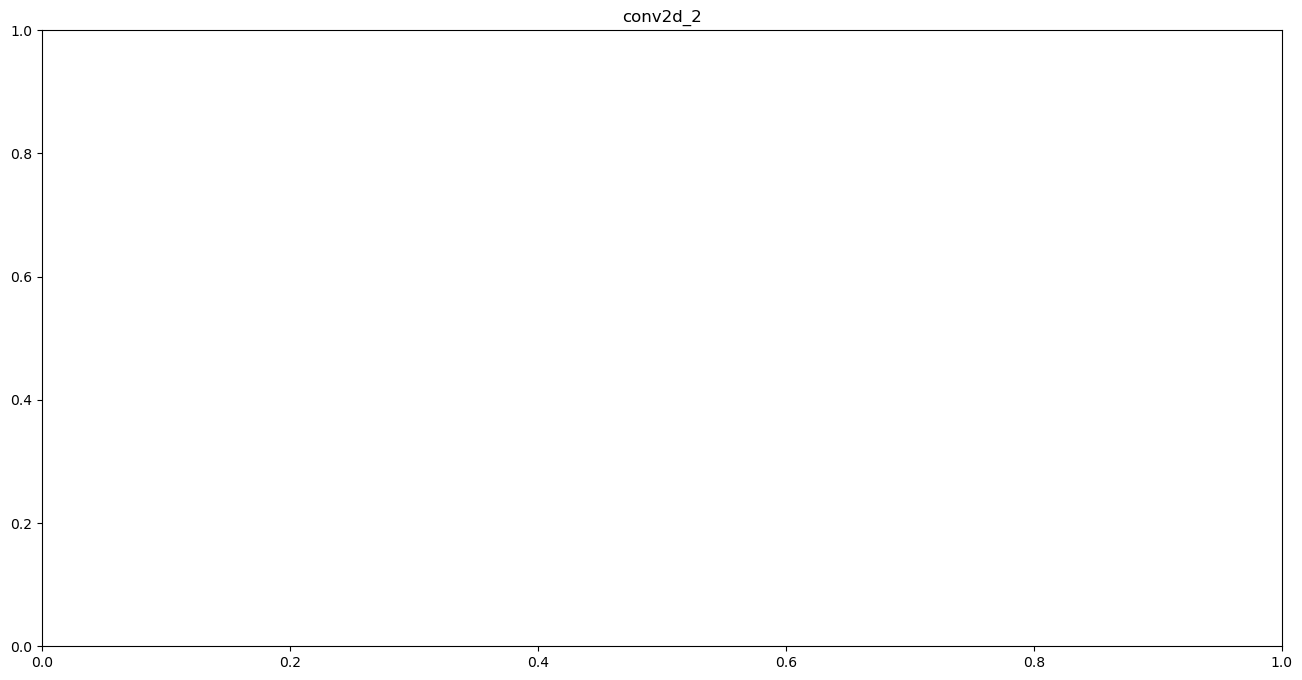

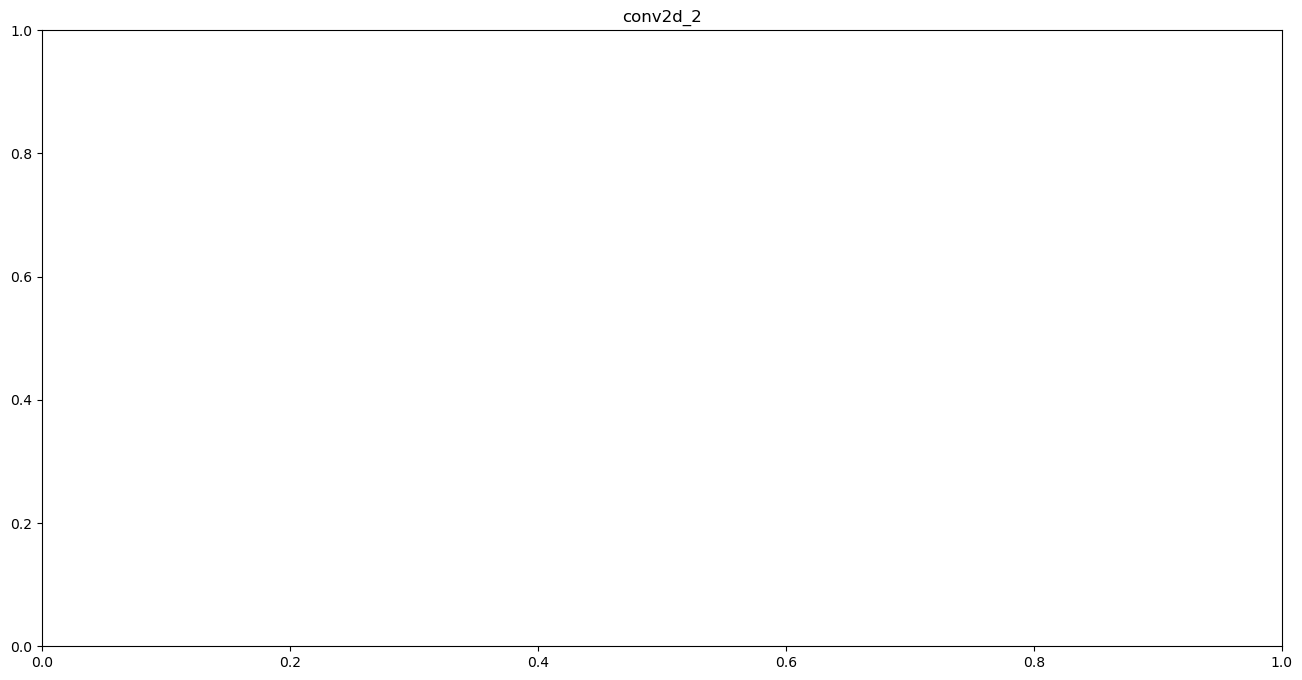

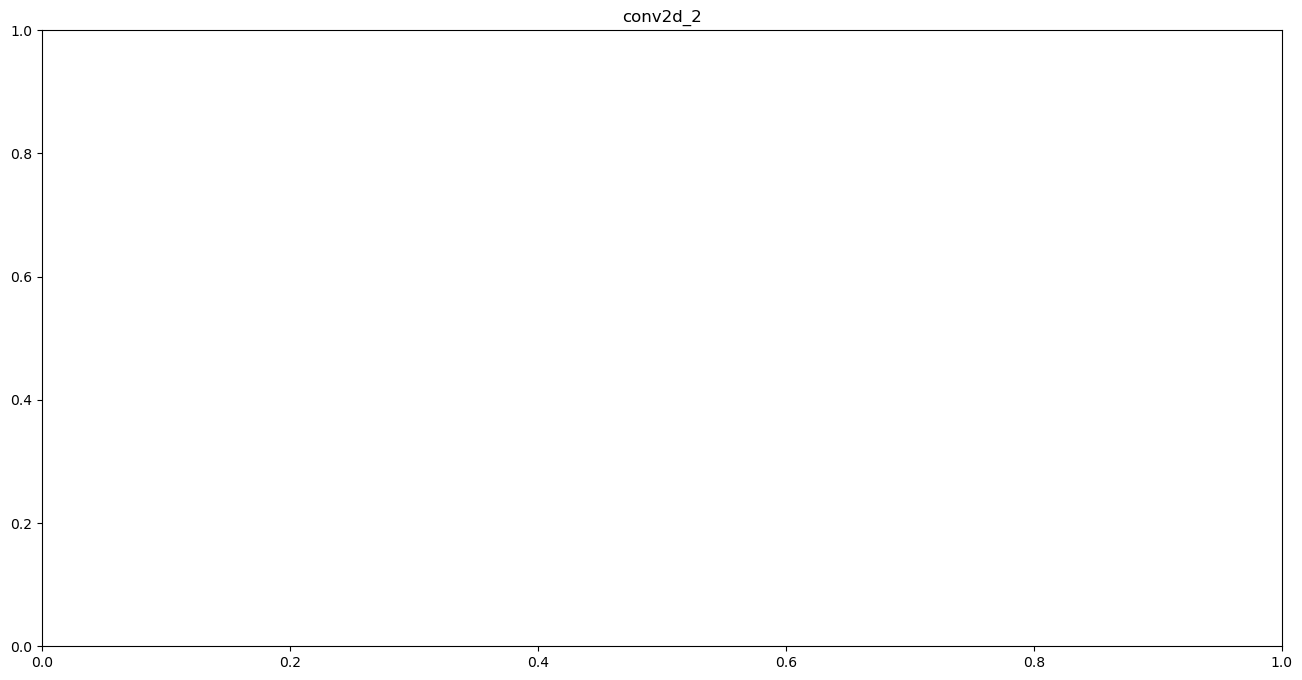

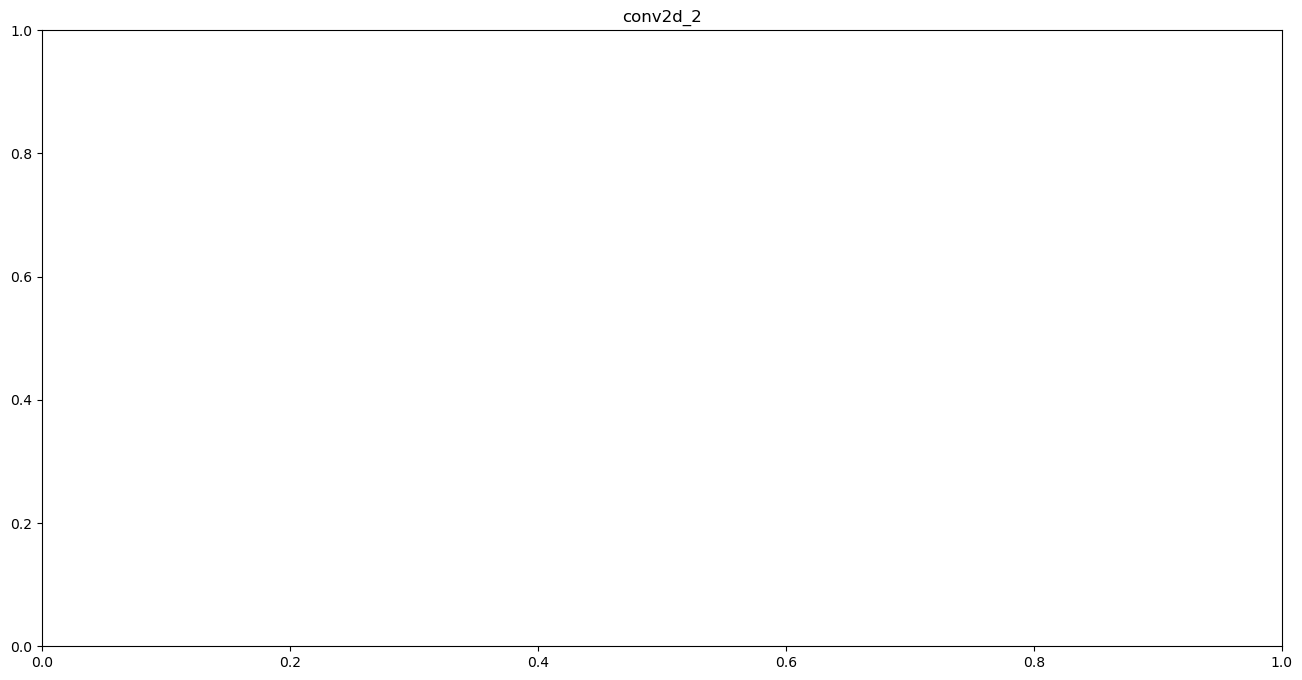

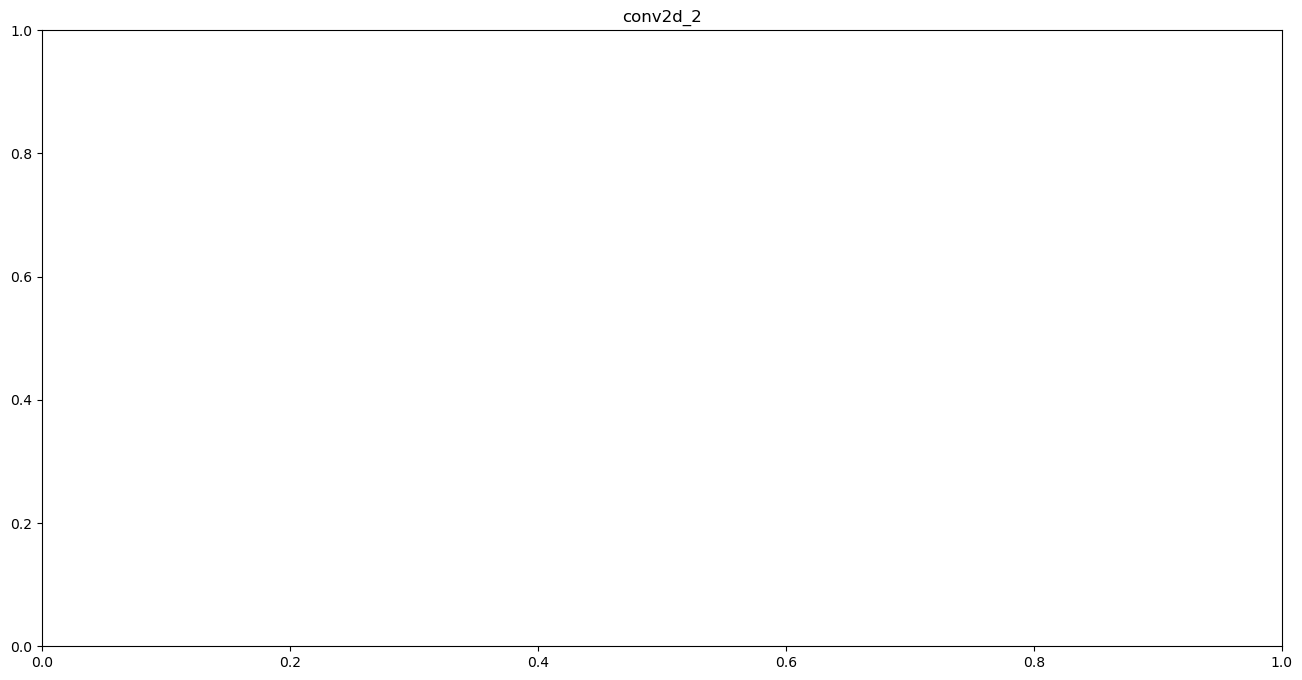

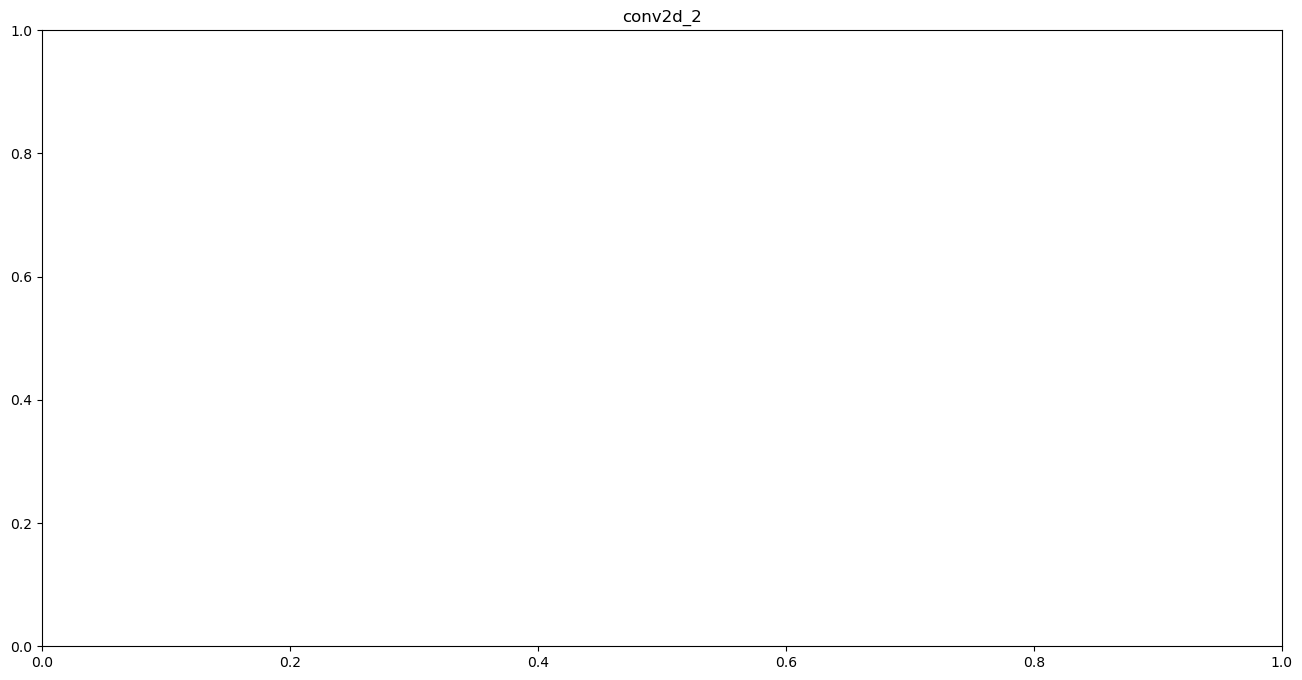

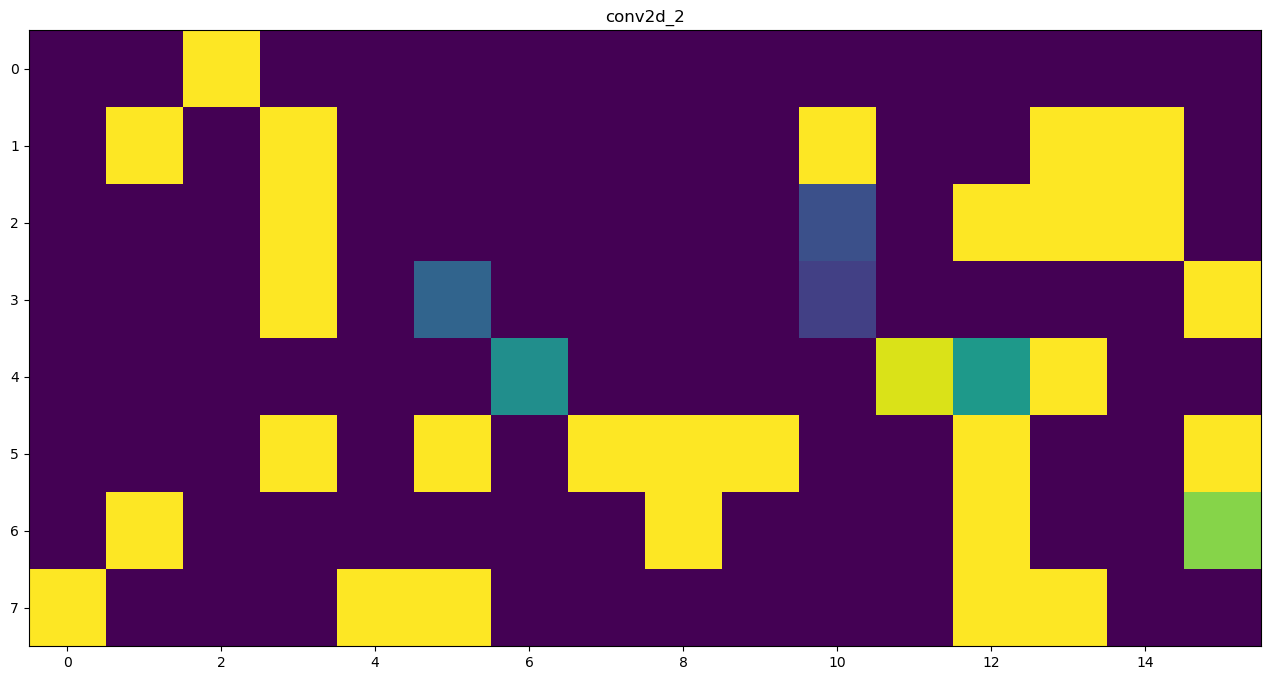

In [79]:
#obtaining the images for two and nine
two = x_test[1]
nine = x_test[7]

#the convolution layers of the model (32, 64, 128 filters)
img = two.reshape(1,28,28,1)

#repeating process for layers 0, 2, & 3 which are the conv layers
for i in [0, 2, 3]:
    layer = model.layers[i]
    layer_name = layer.name

    #defining the activation model and activations for the image of two
    activation_model = keras.Model(inputs=model.inputs, outputs=layer.output)
    activations = activation_model.predict(img)

    #plt.clf()
    # defining tiling conditions
    images_per_row = 16
    #no of features in map and shape (1, 28, 28, n_features)
    n_features = activations.shape[-1] 
    size = activations.shape[1] 
    # number of columns and defining grid to plot
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # tile
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = activations[0, :, :, col * images_per_row + row]
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        # scale images according to size
        scale = 1. / size
        
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        #lt.grid(color='black')
        
    plt.imshow(display_grid, cmap='viridis')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<Figure size 640x480 with 0 Axes>

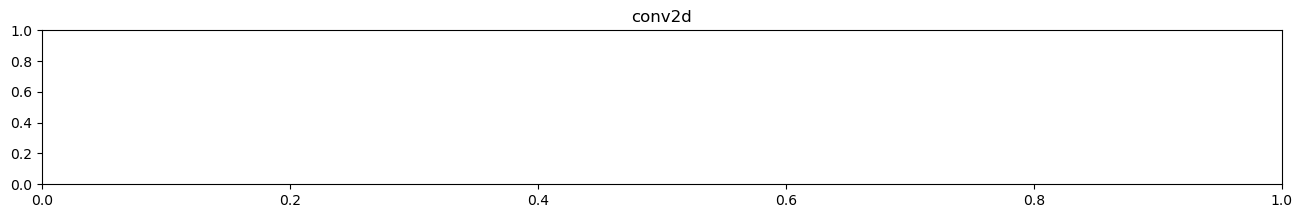

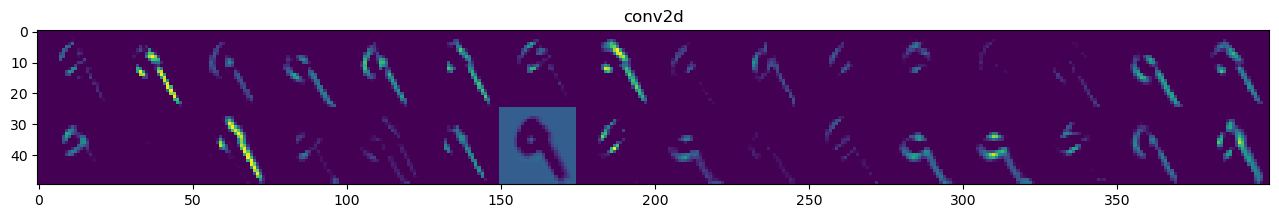

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<Figure size 640x480 with 0 Axes>

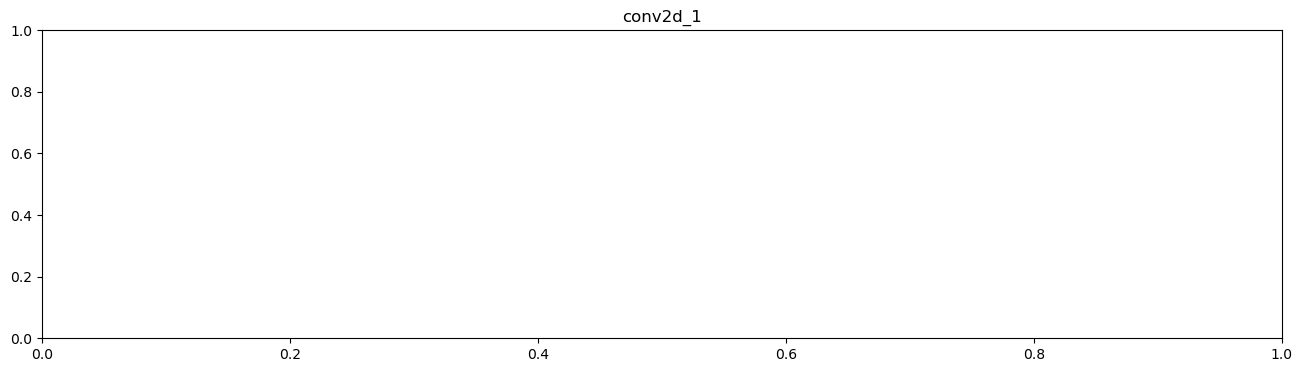

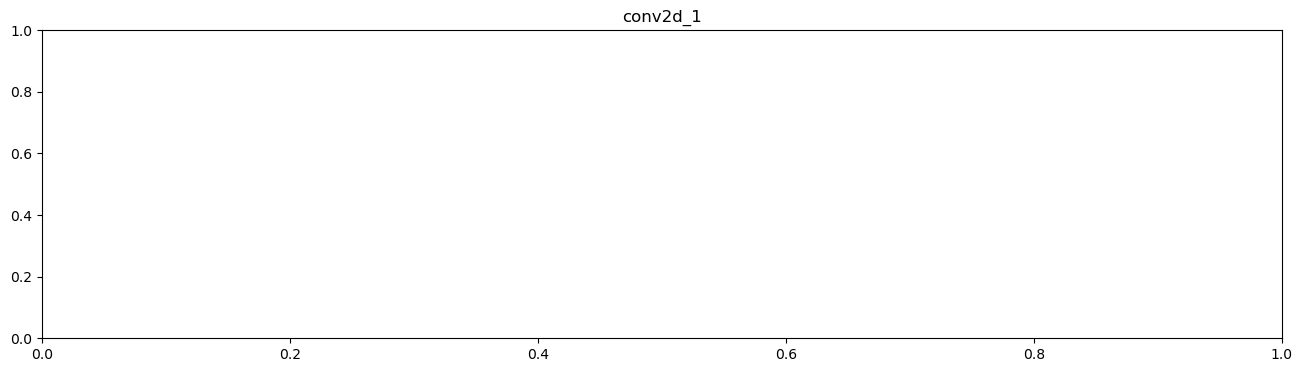

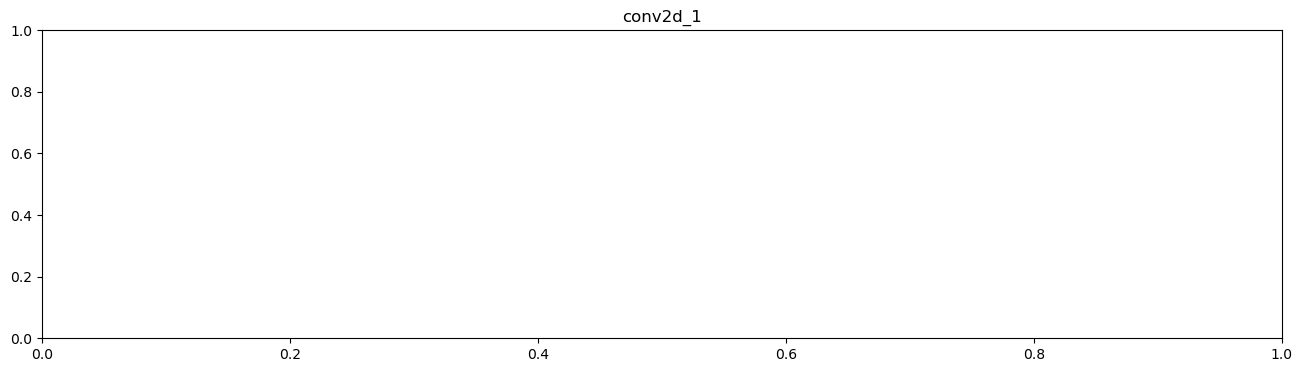

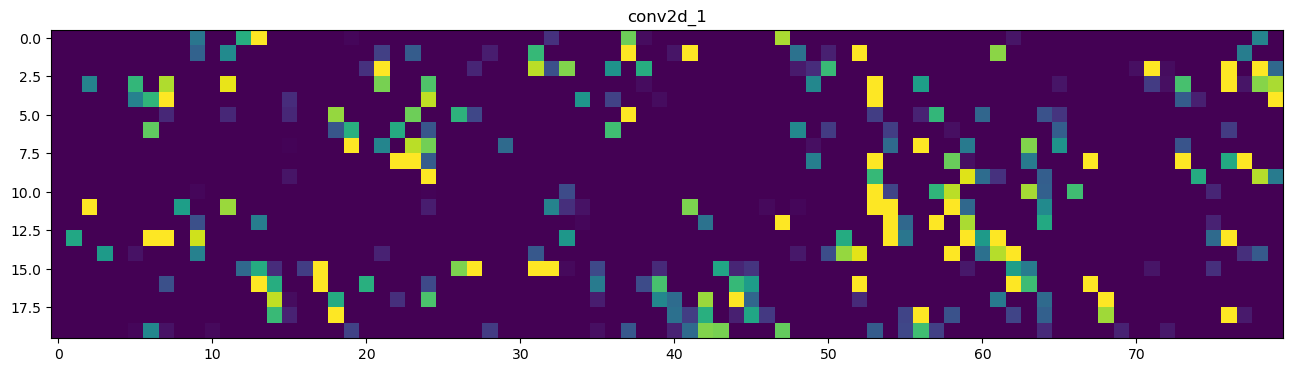

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


<Figure size 640x480 with 0 Axes>

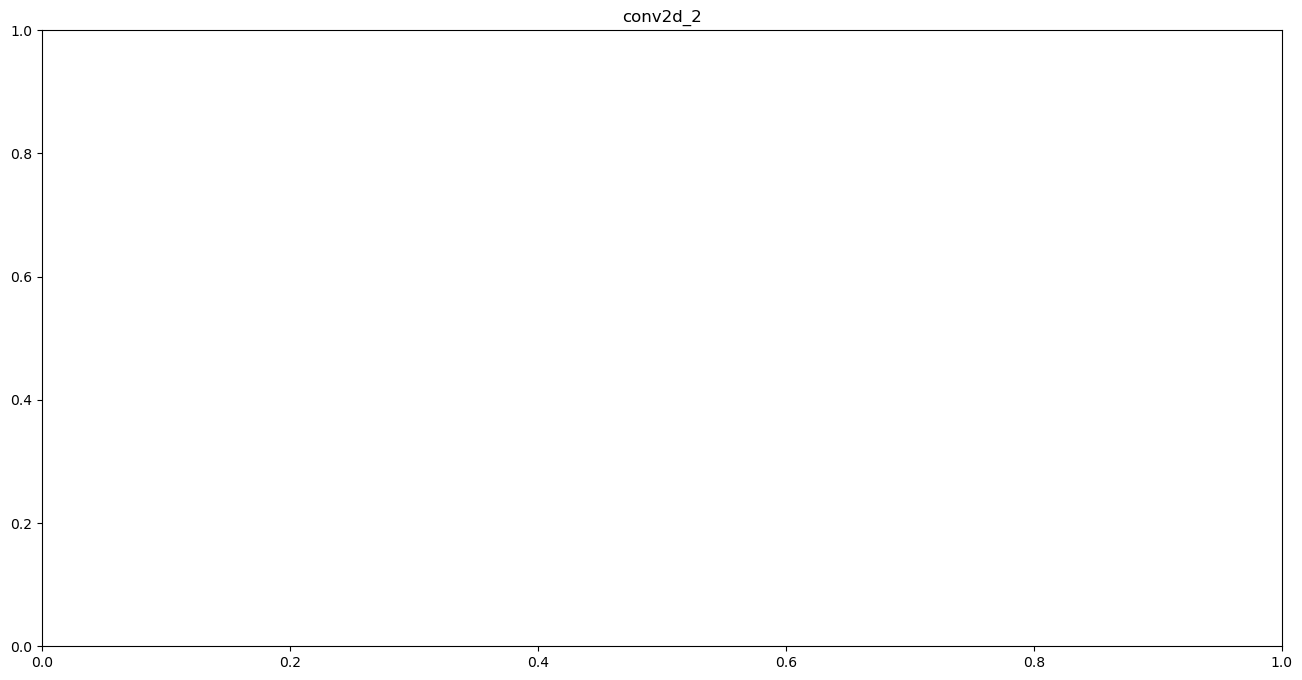

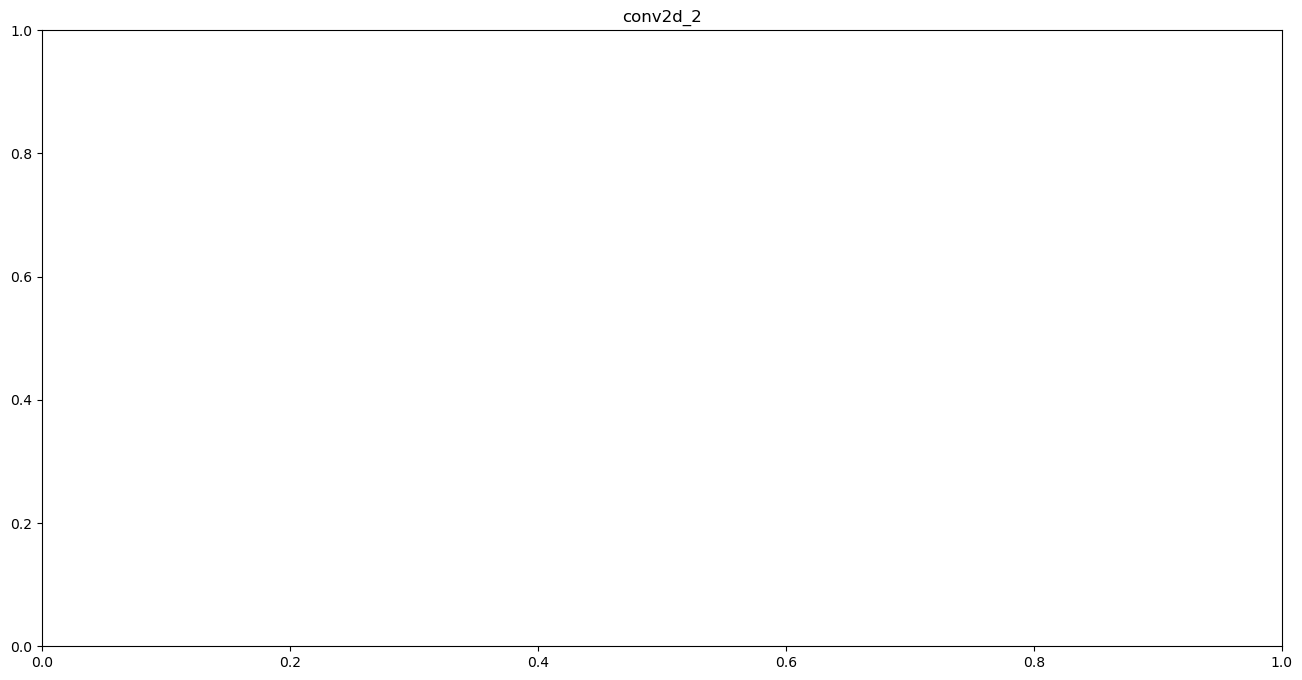

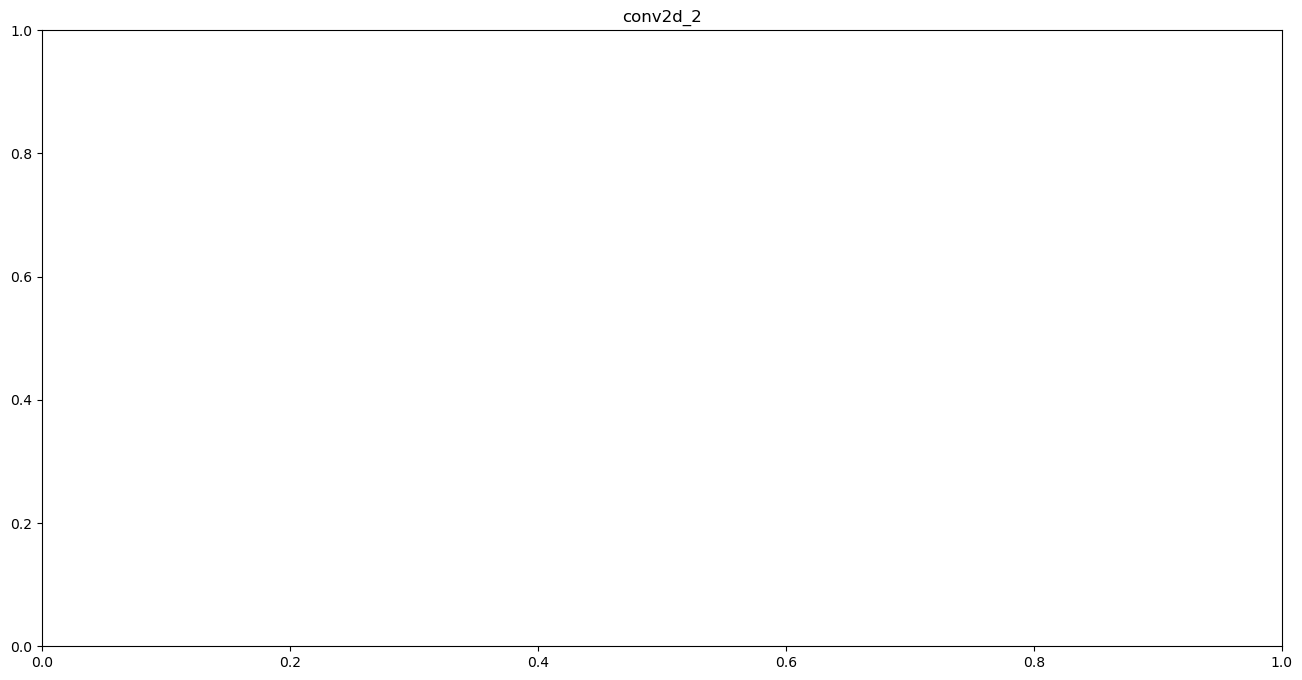

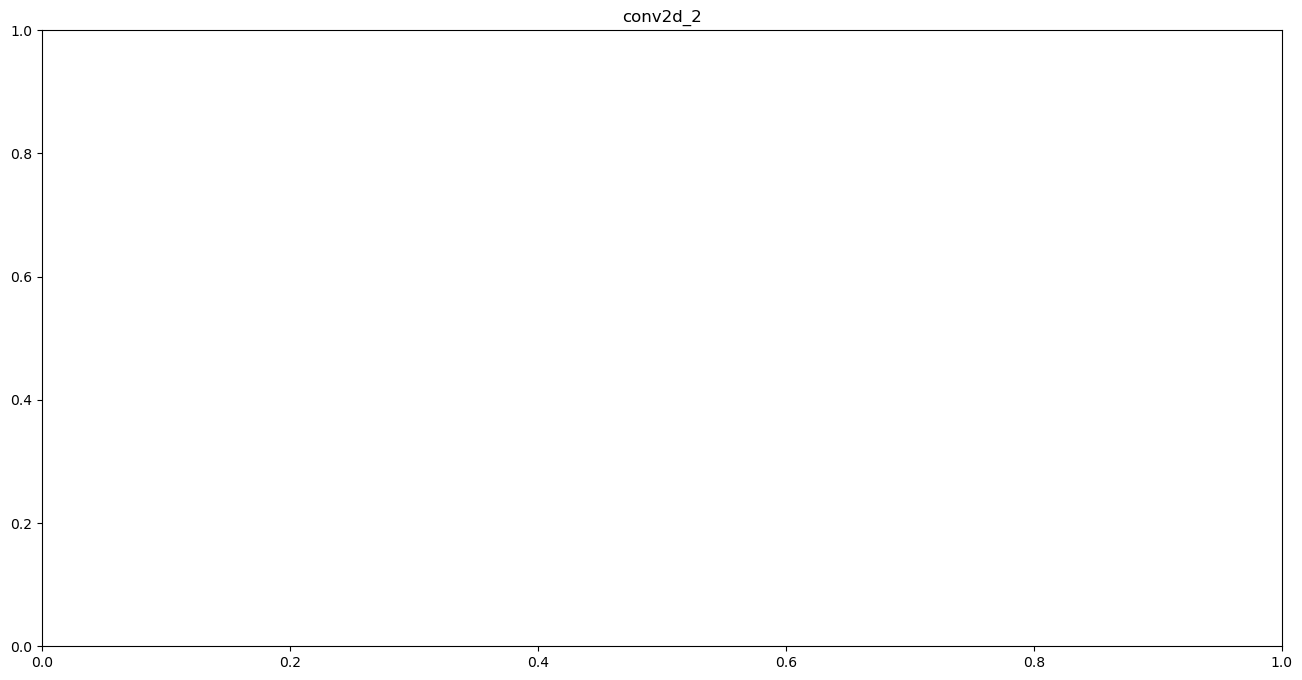

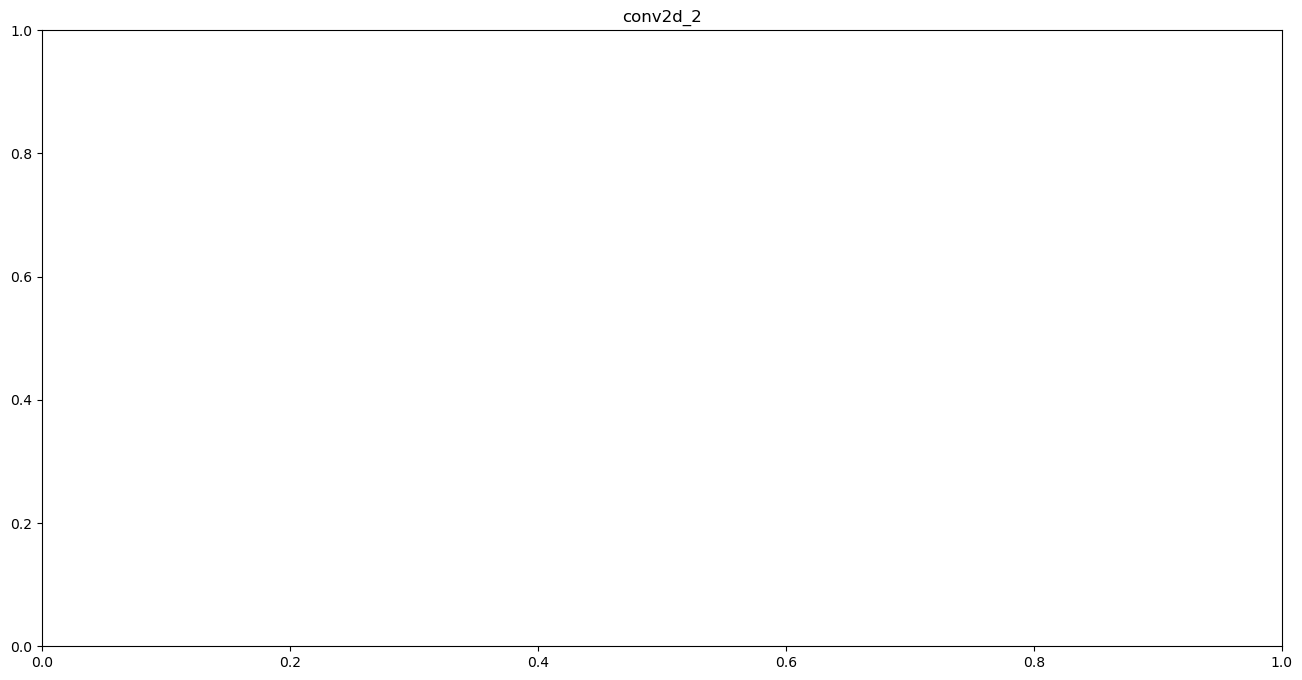

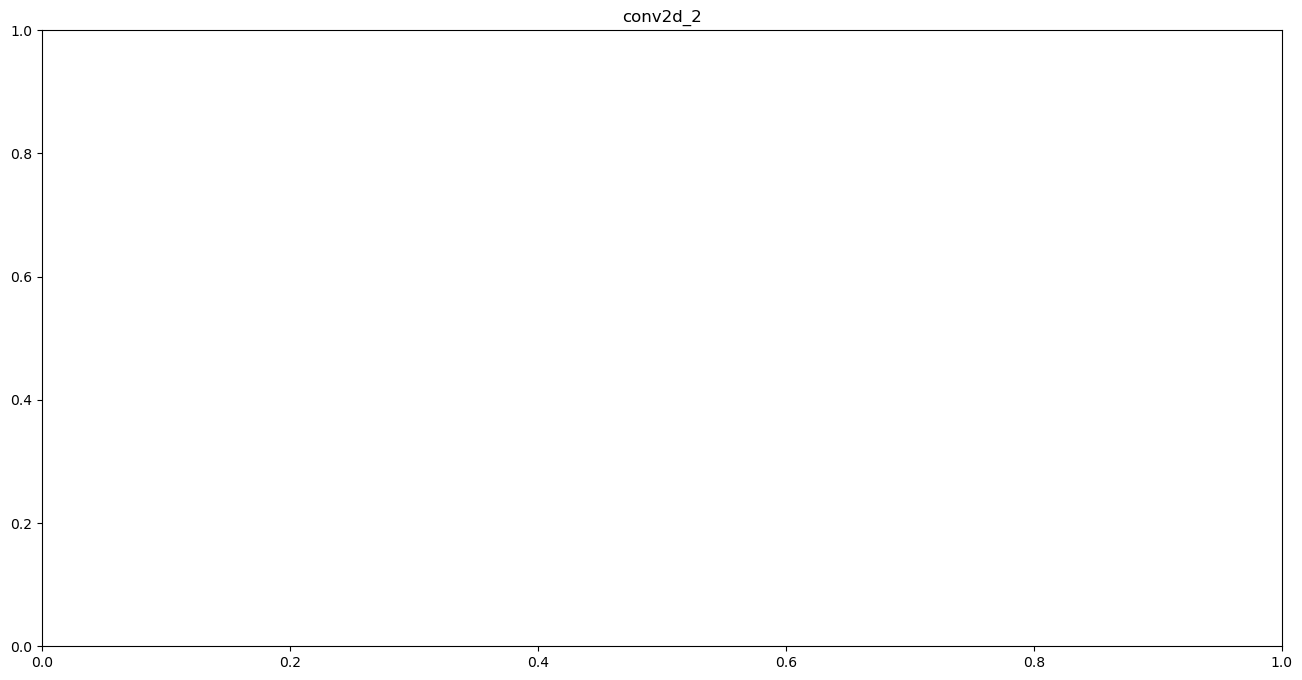

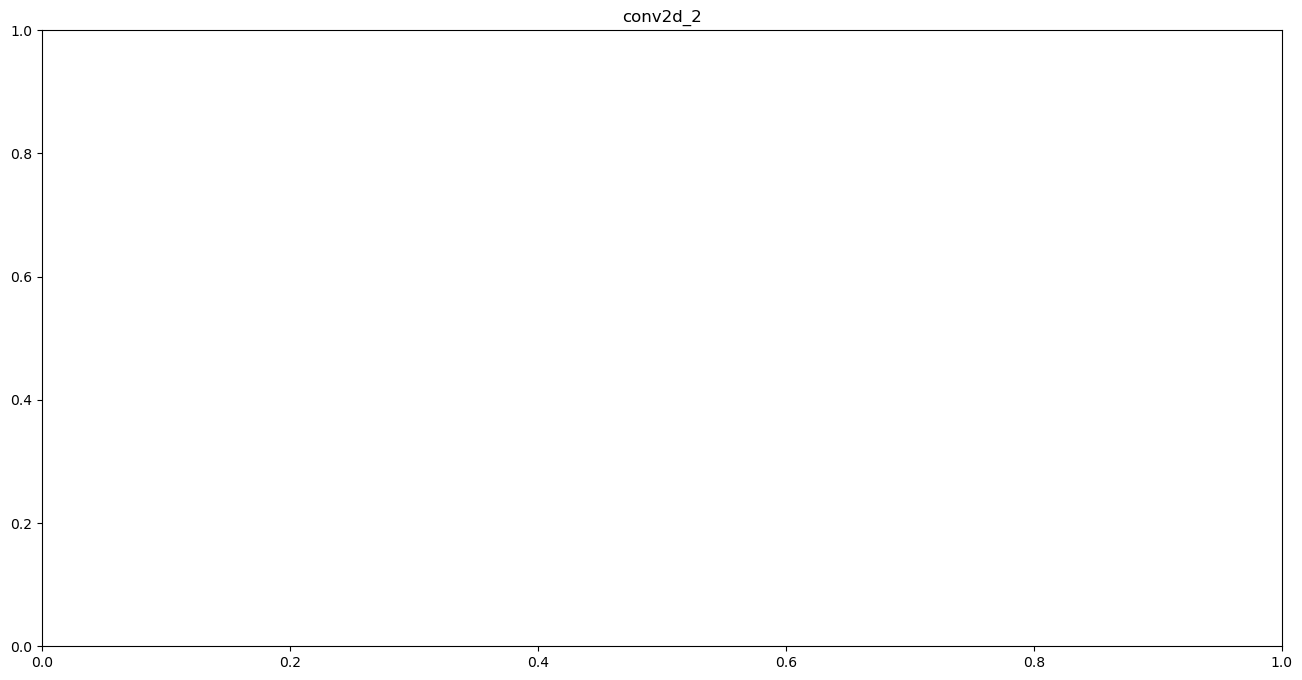

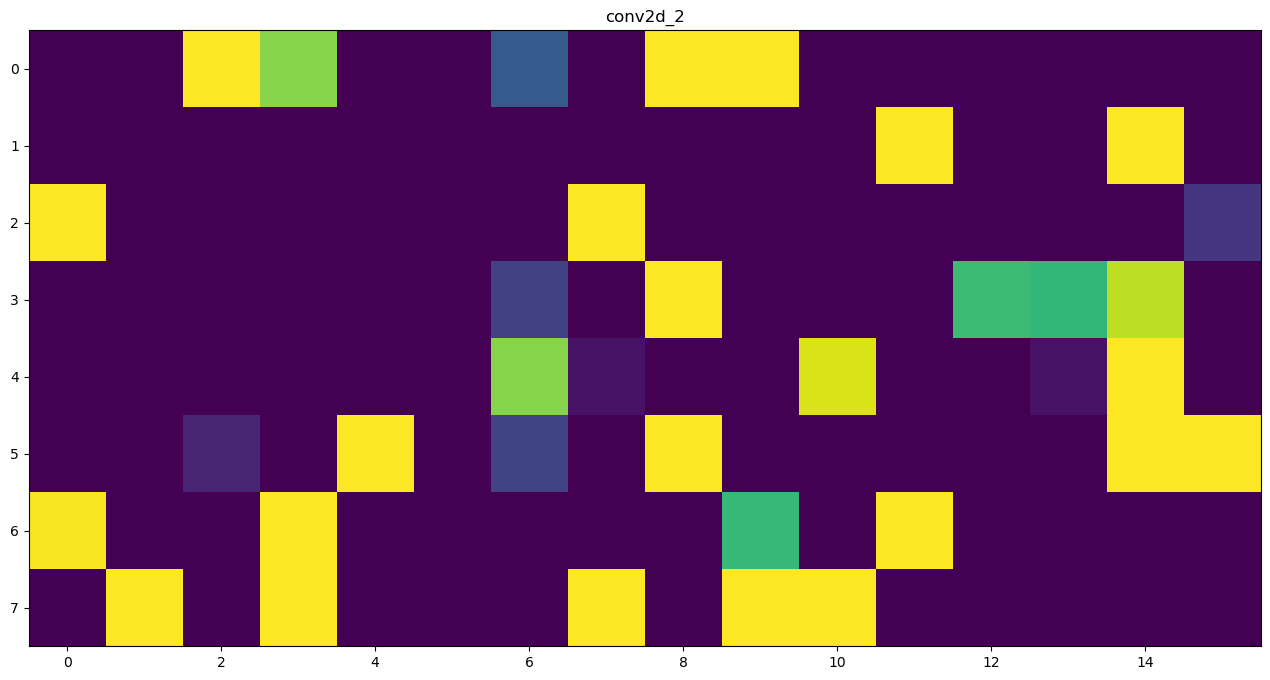

In [80]:
img = nine.reshape(1,28,28,1)

#repeating visualisation process for the digit nine
for i in [0, 2, 3]:
    layer = model.layers[i]
    layer_name = layer.name

    activation_model = keras.Model(inputs=model.inputs, outputs=layer.output)

    activations = activation_model.predict(img)

    plt.clf()
    images_per_row = 16
    n_features = activations.shape[-1] 
    size = activations.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = activations[0, :, :, col * images_per_row + row]
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
    plt.imshow(display_grid, cmap='viridis')
    plt.show()

Tensor("add:0", shape=(1, 28, 28, 1), dtype=float64)
Tensor("add:0", shape=(1, 28, 28, 1), dtype=float64)
Tensor("add:0", shape=(1, 28, 28, 1), dtype=float64)


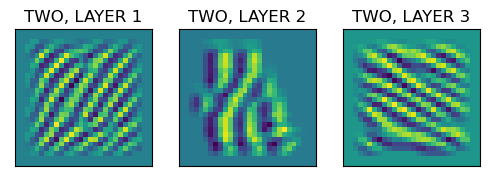

In [103]:
two = x_test[1]
nine = x_test[7]

# defining the image size and layer for which we will extract the deep dream images
img_width = 28
img_height = 28

layer = model.layers[0]
layer_name = layer.name

feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

#using keras' standard visualising what convnets learn code and adapting to mnist
#code can be found here: https://keras.io/examples/vision/visualizing_what_convnets_learn/

#computing the loss for each image
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

#defining a single gradient ascent step
#calculates gradients and adds them to the image, returning the loss and the new image
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    print(img)
    return loss, img

#function to complete the visualisation process for a filter index
#using the default iterations and learning rates from keras' example
def visualize_filter(filter_index, img):
    # We run gradient ascent for 30 steps
    iterations = 50
    learning_rate = 10.0
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img

# visualises image
def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("float64")
    return img #tf.convert_to_tensor(img)

from IPython.display import Image, display

# printing the generated deep dream image for an initial image of noise with an overlaid two
#sometimes the image generation does not return a deep dream image but just noise
#in this case, the gradient ascent did not converge in the thirty iterations

plt.figure(figsize=(6,4))
for layer in [(0,1), (2,2), (3,3)]: #(layer number, plot id)
    img2 = two.reshape(1,28,28,1)
    loss2 = compute_loss(img2, layer[0])
    loss, img2 = visualize_filter(layer[0], img2)
    img2 = deprocess_image(img2)
        
    plt.subplot(1,3,layer[1])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2.squeeze(),cmap='viridis')
    plt.title("TWO, LAYER " + str(layer[1]))
        
plt.show()

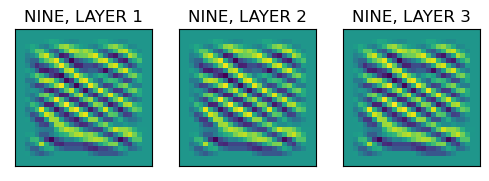

In [104]:
#repeating the process and overlaying a nine
plt.figure(figsize=(6,4))
for layer in [(0,1), (2,2), (3,3)]: #(layer number, plot id)
    img9 = nine.reshape(1,28,28,1)
    loss9 = compute_loss(img9, 0)
    loss, img9 = visualize_filter(0, img9)
    img9 = deprocess_image(img9)
        
    plt.subplot(1,3,layer[1])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2.squeeze(),cmap='viridis')
    plt.title("NINE, LAYER " + str(layer[1]))
        
plt.show()
